# Beijing Chaoyang district Airbnb data analysis

<h4>Background</h4>
<p>There are more than 11,000 Airbnb rooms listed in data set published by "public.opendatasoft.com". For potential investors who want to start a Airbnb business in Beijing, it would beneficial to conduct an analysis based on location, and see if there is any correlation between location features and Airbnb monetization. And for both investors and travelers, they will be benefited from a visualization color coded each Airbnb asset with its segmentation associated with its location features.</p>
<h4>Data Source</h4>
<p>I acquired Airbnb listing data from "public.opendatasoft.com"， which contains a list of Airbnb assets and its location, price, number of rent information. In addition, I used API provided by "Foursquare" to find common venues around Airbnb assets to portrait its location features.</p>

<h3>1. Processing Airbnb Data</h3>

In [7]:
# import basic libraries, and load Airbnb data into pd dataframe
import pandas as pd
import numpy as np
airbnb_data = pd.read_csv('./data/air-bnb-listings-Beijing.csv')
airbnb_data.head()

Room ID    Host ID Neighbourhood        Room type  Room Price  \
0  23863938  147652234      Chaoyang  Entire home/apt         398   
1  23914071   19772308      Chaoyang  Entire home/apt         418   
2  23915836  158663144      Chaoyang  Entire home/apt         397   
3  24186440   94142508      Chaoyang  Entire home/apt         518   
4  24274046   29488633      Chaoyang     Private room         171   

   Minimum nights  Number of reviews Date last review  \
0               1                  6        2/19/2019   
1               1                  1         4/1/2018   
2              20                 49        6/12/2019   
3               1                  0              NaN   
4               1                 15        8/30/2019   

   Number of reviews per month  Rooms rent by the host  Availibility  \
0                         0.35                       5           364   
1                         0.06                       1             0   
2                         2.74                       9             3   
3                          NaN                       7           365   
4                         0.85                      27           358   

  Updated Date     City Country                   Coordinates  
0    9/23/2019  Beijing   China   39.8952155567, 116.46591907  
1    9/23/2019  Beijing   China  39.9577003398, 116.443189661  
2    9/23/2019  Beijing   China    39.891989506, 116.44585669  
3    9/23/2019  Beijing   China  39.9265754348, 116.615418345  
4    9/23/2019  Beijing   China  39.9975167474, 116.464205076

<p>There are many fields which may not useful to our analysis, so we will drop them, but remaining: "Coordinates", to find location features through Foursquare API calls; "Room price", as indication ability of monetization; And "Room type" as we want to only use the most common room type for analysis, as room type itself is a independent variable which price may depend on.</p>

In [8]:
airbnb_data = airbnb_data[['Room type','Room Price','Coordinates']]
airbnb_data.head()

Room type  Room Price                   Coordinates
0  Entire home/apt         398   39.8952155567, 116.46591907
1  Entire home/apt         418  39.9577003398, 116.443189661
2  Entire home/apt         397    39.891989506, 116.44585669
3  Entire home/apt         518  39.9265754348, 116.615418345
4     Private room         171  39.9975167474, 116.464205076

Let's look at the two main dimensions:

In [22]:
airbnb_data.groupby(by='Room type').count()

Room Price  Coordinates
Room type                               
Entire home/apt        6876         6876
Private room           4069         4069
Shared room             885          885

In [24]:
# as most frequent room type is Entire home/apt, we will drop the other two types
airbnb_data.drop( airbnb_data[ airbnb_data['Room type'] == 'Private room' ].index , inplace=True)
airbnb_data.drop( airbnb_data[ airbnb_data['Room type'] == 'Shared room' ].index , inplace=True)

In [26]:
# as now all data is Entire home/apt, we don't need Room type column
airbnb_data.drop(['Room type'], axis = 1, inplace = True)
airbnb_data.head()

Room Price                   Coordinates
0         398   39.8952155567, 116.46591907
1         418  39.9577003398, 116.443189661
2         397    39.891989506, 116.44585669
3         518  39.9265754348, 116.615418345
6         455   39.9331540173, 116.45231878

Next we want to visualize the rooms on the map to have a first impression

In [30]:
airbnb_data['Latitude'], airbnb_data['Longitude'] = airbnb_data['Coordinates'].str.split(',', 1).str
airbnb_data

Room Price                   Coordinates       Latitude       Longitude
0             398   39.8952155567, 116.46591907  39.8952155567    116.46591907
1             418  39.9577003398, 116.443189661  39.9577003398   116.443189661
2             397    39.891989506, 116.44585669   39.891989506    116.44585669
3             518  39.9265754348, 116.615418345  39.9265754348   116.615418345
6             455   39.9331540173, 116.45231878  39.9331540173    116.45231878
...           ...                           ...            ...             ...
11820         391  39.9394216027, 116.447158718  39.9394216027   116.447158718
11823         292   39.915874248, 116.499888534   39.915874248   116.499888534
11826         525  39.9001321372, 116.470426807  39.9001321372   116.470426807
11827         647  39.9324756528, 116.467495116  39.9324756528   116.467495116
11829         801   39.9133870212, 116.47546383  39.9133870212    116.47546383

[6876 rows x 4 columns]

In [31]:
airbnb_data.drop(['Coordinates'], axis = 1, inplace = True)
airbnb_data.head()

Room Price       Latitude       Longitude
0         398  39.8952155567    116.46591907
1         418  39.9577003398   116.443189661
2         397   39.891989506    116.44585669
3         518  39.9265754348   116.615418345
6         455  39.9331540173    116.45231878

In [35]:
airbnb_data['Latitude'] = airbnb_data['Latitude'].astype(float)
airbnb_data['Longitude'] = airbnb_data['Longitude'].astype(float)
airbnb_data.dtypes

Room Price      int64
Latitude      float64
Longitude     float64
dtype: object

In [38]:
airbnb_data.describe()

Room Price     Latitude    Longitude
count   6876.000000  6876.000000  6876.000000
mean     678.210151    39.931395   116.475742
std     2247.202016     0.042466     0.046627
min        0.000000    39.820607   116.347193
25%      391.000000    39.899278   116.448196
50%      491.000000    39.922715   116.466536
75%      631.000000    39.959297   116.494151
max    71110.000000    40.099771   116.621531

In [44]:
airbnb_data.dropna()
airbnb_data.describe()

Room Price     Latitude    Longitude
count   6876.000000  6876.000000  6876.000000
mean     678.210151    39.931395   116.475742
std     2247.202016     0.042466     0.046627
min        0.000000    39.820607   116.347193
25%      391.000000    39.899278   116.448196
50%      491.000000    39.922715   116.466536
75%      631.000000    39.959297   116.494151
max    71110.000000    40.099771   116.621531

In [27]:
# !conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [28]:
latitude = 39.922478
longitude = 116.443710

In [33]:
# create map and display it
mymap = folium.Map(location=[latitude, longitude], zoom_start=12)

mymap

In [73]:
# instantiate a feature group for the incidents in the dataframe
rooms = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(airbnb_data.Latitude, airbnb_data.Longitude):
    rooms.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
mymap.add_child(rooms)

As there are too many rooms, we probably want to group the rooms into neighborhoods first, purely based on their coordinations.

In [37]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

In [48]:
X = airbnb_data[['Latitude','Longitude']].values
X

array([[ 39.89521556, 116.46591907],
       [ 39.95770034, 116.44318966],
       [ 39.89198951, 116.44585669],
       ...,
       [ 39.90013214, 116.47042681],
       [ 39.93247565, 116.46749512],
       [ 39.91338702, 116.47546383]])

In [49]:
epsilon = 0.003
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
frames = [airbnb_data, pd.DataFrame(labels)]
data_all = pd.concat(frames, axis = 1)
data_all

Room Price   Latitude   Longitude    0
0           398.0  39.895216  116.465919  0.0
1           418.0  39.957700  116.443190  1.0
2           397.0  39.891990  116.445857  0.0
3           518.0  39.926575  116.615418  2.0
4             NaN        NaN         NaN  0.0
...           ...        ...         ...  ...
11820       391.0  39.939422  116.447159  NaN
11823       292.0  39.915874  116.499889  NaN
11826       525.0  39.900132  116.470427  NaN
11827       647.0  39.932476  116.467495  NaN
11829       801.0  39.913387  116.475464  NaN

[9759 rows x 4 columns]

In [57]:
data_all = data_all.dropna()
data_all

Room Price   Latitude   Longitude    0
0          398.0  39.895216  116.465919  0.0
1          418.0  39.957700  116.443190  1.0
2          397.0  39.891990  116.445857  0.0
3          518.0  39.926575  116.615418  2.0
6          455.0  39.933154  116.452319  0.0
...          ...        ...         ...  ...
6871       461.0  40.001994  116.406207  0.0
6872      1340.0  39.959243  116.464479  0.0
6873       427.0  39.989369  116.475124  0.0
6874       652.0  39.958249  116.466196  0.0
6875       597.0  39.908001  116.498314  0.0

[3993 rows x 4 columns]

In [61]:
data_all.columns

Index(['Room Price', 'Latitude', 'Longitude', 0], dtype='object')

In [84]:
data = data_all.groupby([0]).mean()
data

Room Price   Latitude   Longitude
0                                        
-1.0    764.677019  39.931676  116.478618
 0.0    688.134978  39.931880  116.476359
 1.0    629.724138  39.934953  116.472465
 2.0    574.338028  39.925770  116.466964
 3.0    579.641026  39.931673  116.479403
 4.0    584.870370  39.930604  116.477823
 5.0    589.500000  39.932837  116.467235
 6.0    829.217391  39.931264  116.471659
 7.0    638.112360  39.933267  116.473743
 8.0    687.900000  39.903504  116.473258
 9.0   1026.852713  39.931487  116.476211
 10.0   643.952830  39.933229  116.471730
 11.0  1390.250000  39.899693  116.526013
 12.0   560.619048  39.941850  116.460735
 13.0   512.608696  39.936971  116.475699
 14.0   583.613636  39.926983  116.479327
 15.0   651.975000  39.918977  116.492646
 16.0   569.375000  39.945509  116.472930
 17.0  1218.911111  39.929052  116.478631
 18.0   493.200000  39.930461  116.467434
 19.0   481.875000  39.933942  116.472431
 20.0   528.300000  39.939178  116.468105
 21.0   511.222222  39.920243  116.472158
 22.0   481.000000  39.926609  116.475856
 23.0   516.538462  39.914285  116.483535
 24.0   611.166667  39.904351  116.487356
 25.0   514.750000  39.936811  116.476208
 26.0   632.000000  39.921874  116.473892
 27.0   463.166667  39.920046  116.486993
 28.0   495.777778  39.962028  116.470660
 29.0  1145.333333  39.934198  116.464107
 30.0   781.250000  39.943900  116.447120
 31.0   670.142857  39.912957  116.482282
 32.0   690.000000  39.964928  116.455305
 33.0   398.250000  39.953129  116.469291
 34.0   462.200000  39.934563  116.504243
 35.0   480.800000  39.930732  116.451137
 36.0   573.625000  39.939988  116.455584
 37.0   624.833333  39.941205  116.474106
 38.0   499.400000  39.958658  116.455985
 39.0   405.000000  39.914433  116.455897
 40.0   409.000000  39.907356  116.472702

In [86]:
data.reset_index(inplace=True)
data.rename(columns={0:'Neighborhood','Room Price':'Price'}, inplace=True)
data

Neighborhood        Price   Latitude   Longitude
0           -1.0   764.677019  39.931676  116.478618
1            0.0   688.134978  39.931880  116.476359
2            1.0   629.724138  39.934953  116.472465
3            2.0   574.338028  39.925770  116.466964
4            3.0   579.641026  39.931673  116.479403
5            4.0   584.870370  39.930604  116.477823
6            5.0   589.500000  39.932837  116.467235
7            6.0   829.217391  39.931264  116.471659
8            7.0   638.112360  39.933267  116.473743
9            8.0   687.900000  39.903504  116.473258
10           9.0  1026.852713  39.931487  116.476211
11          10.0   643.952830  39.933229  116.471730
12          11.0  1390.250000  39.899693  116.526013
13          12.0   560.619048  39.941850  116.460735
14          13.0   512.608696  39.936971  116.475699
15          14.0   583.613636  39.926983  116.479327
16          15.0   651.975000  39.918977  116.492646
17          16.0   569.375000  39.945509  116.472930
18          17.0  1218.911111  39.929052  116.478631
19          18.0   493.200000  39.930461  116.467434
20          19.0   481.875000  39.933942  116.472431
21          20.0   528.300000  39.939178  116.468105
22          21.0   511.222222  39.920243  116.472158
23          22.0   481.000000  39.926609  116.475856
24          23.0   516.538462  39.914285  116.483535
25          24.0   611.166667  39.904351  116.487356
26          25.0   514.750000  39.936811  116.476208
27          26.0   632.000000  39.921874  116.473892
28          27.0   463.166667  39.920046  116.486993
29          28.0   495.777778  39.962028  116.470660
30          29.0  1145.333333  39.934198  116.464107
31          30.0   781.250000  39.943900  116.447120
32          31.0   670.142857  39.912957  116.482282
33          32.0   690.000000  39.964928  116.455305
34          33.0   398.250000  39.953129  116.469291
35          34.0   462.200000  39.934563  116.504243
36          35.0   480.800000  39.930732  116.451137
37          36.0   573.625000  39.939988  116.455584
38          37.0   624.833333  39.941205  116.474106
39          38.0   499.400000  39.958658  116.455985
40          39.0   405.000000  39.914433  116.455897
41          40.0   409.000000  39.907356  116.472702

In [77]:
data.dtypes

Neighborhood    float64
Room Price      float64
Latitude        float64
Longitude       float64
dtype: object

In [95]:
# create map and display it
newmap = folium.Map(location=[latitude, longitude], zoom_start=12)

newmap

In [96]:
# instantiate a feature group for the incidents in the dataframe
neighborhoods = folium.map.FeatureGroup()

for lat, lng, price in zip(data.Latitude, data.Longitude, data.Price):
    neighborhoods.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=20-6000/price, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )

# add incidents to map
newmap.add_child(neighborhoods)

Now we have 40 neighborhoods. We showed them on a map with bubble size represent each neighborhood's average price. Next is to acquire features in each location, and cluster neighborhoods into segments to see if the segmentation is correlated to average price.

<h3>2. Acquire Location Features and Clustering</h3>

In [97]:
address = 'Chaoyang, Beijing'
# as geocoder service timeout, use average location
latitude = data['Latitude'].mean()
longitude = data['Longitude'].mean()
print('The geograpical coordinate of Chaoyang are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chaoyang are 39.930882166694666, 116.4736627259893.


In [98]:
CLIENT_ID = 'UNB1ZPJYRJ4XHM31H2E3SVOUAMGAPRXK0H1S11SWHZSU4OOO' # your Foursquare ID
CLIENT_SECRET = '2JOEJTF4UXPM1HZPJL1GBZLUPTZNUSG4RGBVABVUH52PLMR0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UNB1ZPJYRJ4XHM31H2E3SVOUAMGAPRXK0H1S11SWHZSU4OOO
CLIENT_SECRET:2JOEJTF4UXPM1HZPJL1GBZLUPTZNUSG4RGBVABVUH52PLMR0


In [103]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=10):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        res = requests.get(url).json()
        print(res)
        if res["response"]['groups']:
            results = res["response"]['groups'][0]['items']

            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [104]:
nn = getNearbyVenues(names=data['Neighborhood'], latitudes=data['Latitude'], longitudes=data['Longitude'], radius=500, LIMIT=10)
nn.head()

-1.0
{'meta': {'code': 200, 'requestId': '5e4810181d67cb001ba9949a'}, 'response': {'headerLocation': 'Cháoyáng qū', 'headerFullLocation': 'Cháoyáng qū, Beijing', 'headerLocationGranularity': 'neighborhood', 'totalResults': 10, 'suggestedBounds': {'ne': {'lat': 39.936176119240365, 'lng': 116.48447550678637}, 'sw': {'lat': 39.92717611024036, 'lng': 116.47276047936268}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b1a1861f964a52085e723e3', 'name': 'Jamaica Blue 蓝色牙买加', 'location': {'address': '朝阳区公园南路6号 • #115, 6 Chaoyang Park South Rd', 'crossStreet': '甜水园东路 • Tianshuiyuan East Rd', 'lat': 39.93016446931906, 'lng': 116.47866364688143, 'labeledLatLngs': [{'label': 'display', 'lat': 39.93016446931906, 'lng': 116.47866364688143}], 'distance': 168, 'cc': 'CN', 'city': '北京市', 'state': '北京市', 'country': '中国', 'for

{'meta': {'code': 200, 'requestId': '5e481095ad1ab4001bcf3e3f'}, 'response': {'headerLocation': 'Cháoyáng qū', 'headerFullLocation': 'Cháoyáng qū, Beijing', 'headerLocationGranularity': 'neighborhood', 'totalResults': 17, 'suggestedBounds': {'ne': {'lat': 39.93638020268086, 'lng': 116.48221633550845}, 'sw': {'lat': 39.927380193680854, 'lng': 116.47050127315528}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b1a1861f964a52085e723e3', 'name': 'Jamaica Blue 蓝色牙买加', 'location': {'address': '朝阳区公园南路6号 • #115, 6 Chaoyang Park South Rd', 'crossStreet': '甜水园东路 • Tianshuiyuan East Rd', 'lat': 39.93016446931906, 'lng': 116.47866364688143, 'labeledLatLngs': [{'label': 'display', 'lat': 39.93016446931906, 'lng': 116.47866364688143}], 'distance': 274, 'cc': 'CN', 'city': '北京市', 'state': '北京市', 'country': '中国', 'formatte

{'meta': {'code': 200, 'requestId': '5e481075923935001bcd4e8e'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Cháoyáng qū', 'headerFullLocation': 'Cháoyáng qū, Beijing', 'headerLocationGranularity': 'neighborhood', 'totalResults': 14, 'suggestedBounds': {'ne': {'lat': 39.939452817689656, 'lng': 116.47832277345205}, 'sw': {'lat': 39.93045280868965, 'lng': 116.46660718516853}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4e75baf7483b0cf5ece0a417', 'name': '8号温泉 No. 8 Hot Springs Club', 'location': {'address': '8 Chaoyang Park W Rd', 'lat': 39.936530878832436, 'lng': 116.47129841417875, 'labeledLatLngs': [{'label': 'display', 'lat': 39.936530878832436, 'lng': 116.47129841417875}], 'distance': 201, 'cc': 'CN', 'city': '北京市',

{'meta': {'code': 200, 'requestId': '5e480f90dd0f85002920e64d'}, 'response': {'headerLocation': 'Cháoyáng qū', 'headerFullLocation': 'Cháoyáng qū, Beijing', 'headerLocationGranularity': 'neighborhood', 'totalResults': 10, 'suggestedBounds': {'ne': {'lat': 39.93027007656481, 'lng': 116.4728211158074}, 'sw': {'lat': 39.921270067564805, 'lng': 116.4611070990659}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b8fac71f964a520645c33e3', 'name': '眉州东坡酒楼 Meizhou Dongpo Restaurant', 'location': {'address': 'Yaojiayuan Rd', 'crossStreet': 'Near Tuanjiehu Rd', 'lat': 39.92900150128262, 'lng': 116.46466376599295, 'labeledLatLngs': [{'label': 'display', 'lat': 39.92900150128262, 'lng': 116.46466376599295}], 'distance': 409, 'cc': 'CN', 'city': '北京市', 'state': '北京市', 'country': '中国', 'formattedAddress': ['Yaojiayuan Rd (

{'meta': {'code': 200, 'requestId': '5e4810c3c94979001bab9101'}, 'response': {'headerLocation': 'Cháoyáng qū', 'headerFullLocation': 'Cháoyáng qū, Beijing', 'headerLocationGranularity': 'neighborhood', 'totalResults': 8, 'suggestedBounds': {'ne': {'lat': 39.936172698484626, 'lng': 116.48526039870116}, 'sw': {'lat': 39.92717268948462, 'lng': 116.47354537186293}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b1a1861f964a52085e723e3', 'name': 'Jamaica Blue 蓝色牙买加', 'location': {'address': '朝阳区公园南路6号 • #115, 6 Chaoyang Park South Rd', 'crossStreet': '甜水园东路 • Tianshuiyuan East Rd', 'lat': 39.93016446931906, 'lng': 116.47866364688143, 'labeledLatLngs': [{'label': 'display', 'lat': 39.93016446931906, 'lng': 116.47866364688143}], 'distance': 179, 'cc': 'CN', 'city': '北京市', 'state': '北京市', 'country': '中国', 'formatted

{'meta': {'code': 200, 'requestId': '5e4810321d67cb001baa13df'}, 'response': {'headerLocation': 'Cháoyáng qū', 'headerFullLocation': 'Cháoyáng qū, Beijing', 'headerLocationGranularity': 'neighborhood', 'totalResults': 15, 'suggestedBounds': {'ne': {'lat': 39.93733706264821, 'lng': 116.47309225645648}, 'sw': {'lat': 39.92833705364821, 'lng': 116.46137703032912}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4e4608657d8b91a0658a4a5b', 'name': 'Deli de Luxe', 'location': {'address': '1 Jingyuan Xiao Jie', 'crossStreet': 'Chaoyang Gong Yuan Xi Lu', 'lat': 39.934683507549735, 'lng': 116.46657729515653, 'labeledLatLngs': [{'label': 'display', 'lat': 39.934683507549735, 'lng': 116.46657729515653}], 'distance': 213, 'postalCode': '100025', 'cc': 'CN', 'city': '北京市', 'state': '北京市', 'country': '中国', 'formattedAddress

{'meta': {'code': 200, 'requestId': '5e4810ce542890001bda51b2'}, 'response': {'headerLocation': 'Cháoyáng qū', 'headerFullLocation': 'Cháoyáng qū, Beijing', 'headerLocationGranularity': 'neighborhood', 'totalResults': 12, 'suggestedBounds': {'ne': {'lat': 39.93576381817102, 'lng': 116.47751682729869}, 'sw': {'lat': 39.926763809171014, 'lng': 116.46580187044047}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4d4cd138d6f3224b593a95a6', 'name': 'SUBWAY (赛百味)', 'location': {'address': '27号-29号 Shuiduizi E St', 'lat': 39.93063647, 'lng': 116.47258093, 'labeledLatLngs': [{'label': 'display', 'lat': 39.93063647, 'lng': 116.47258093}], 'distance': 105, 'cc': 'CN', 'city': '北京市', 'state': '北京市', 'country': '中国', 'formattedAddress': ['27号-29号 Shuiduizi E St', '北京市', '北京市', '中国']}, 'categories': [{'id': '4bf58dd8d48988

{'meta': {'code': 200, 'requestId': '5e4810e8be61c9001b583b2f'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Cháoyáng qū', 'headerFullLocation': 'Cháoyáng qū, Beijing', 'headerLocationGranularity': 'neighborhood', 'totalResults': 12, 'suggestedBounds': {'ne': {'lat': 39.937766711237664, 'lng': 116.47960066165973}, 'sw': {'lat': 39.92876670223766, 'lng': 116.46788536199205}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4e75baf7483b0cf5ece0a417', 'name': '8号温泉 No. 8 Hot Springs Club', 'location': {'address': '8 Chaoyang Park W Rd', 'lat': 39.936530878832436, 'lng': 116.47129841417875, 'labeledLatLngs': [{'label': 'display', 'lat': 39.936530878832436, 'lng': 116.47129841417875}], 'distance': 419, 'cc': 'CN', 'city': '北京市',

{'meta': {'code': 200, 'requestId': '5e48104571c428001bfb09d0'}, 'response': {'headerLocation': 'Cháoyáng qū', 'headerFullLocation': 'Cháoyáng qū, Beijing', 'headerLocationGranularity': 'neighborhood', 'totalResults': 11, 'suggestedBounds': {'ne': {'lat': 39.9080040441, 'lng': 116.47911308205639}, 'sw': {'lat': 39.89900403509999, 'lng': 116.46740287294367}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '52c88e8311d2704eec4b67f8', 'name': 'Apple China Central Mall (Apple 华贸购物中心)', 'location': {'address': '81 Jianguo Rd | 建国路81号', 'crossStreet': 'China Central Mall | 华贸购物中心', 'lat': 39.907956782123264, 'lng': 116.47323827117167, 'labeledLatLngs': [{'label': 'display', 'lat': 39.907956782123264, 'lng': 116.47323827117167}], 'distance': 495, 'postalCode': '100025', 'cc': 'CN', 'neighborhood': 'Chāoyáng', 'city': 

{'meta': {'code': 200, 'requestId': '5e4811009fcb92001be395c0'}, 'response': {'headerLocation': 'Cháoyáng qū', 'headerFullLocation': 'Cháoyáng qū, Beijing', 'headerLocationGranularity': 'neighborhood', 'totalResults': 17, 'suggestedBounds': {'ne': {'lat': 39.93598667661938, 'lng': 116.48206818467068}, 'sw': {'lat': 39.926986667619374, 'lng': 116.47035318967033}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b1a1861f964a52085e723e3', 'name': 'Jamaica Blue 蓝色牙买加', 'location': {'address': '朝阳区公园南路6号 • #115, 6 Chaoyang Park South Rd', 'crossStreet': '甜水园东路 • Tianshuiyuan East Rd', 'lat': 39.93016446931906, 'lng': 116.47866364688143, 'labeledLatLngs': [{'label': 'display', 'lat': 39.93016446931906, 'lng': 116.47866364688143}], 'distance': 255, 'cc': 'CN', 'city': '北京市', 'state': '北京市', 'country': '中国', 'formatte

{'meta': {'code': 200, 'requestId': '5e481059882fc7001b0db06c'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Cháoyáng qū', 'headerFullLocation': 'Cháoyáng qū, Beijing', 'headerLocationGranularity': 'neighborhood', 'totalResults': 20, 'suggestedBounds': {'ne': {'lat': 39.937728544423585, 'lng': 116.47758714913347}, 'sw': {'lat': 39.92872853542358, 'lng': 116.46587185599863}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4e75baf7483b0cf5ece0a417', 'name': '8号温泉 No. 8 Hot Springs Club', 'location': {'address': '8 Chaoyang Park W Rd', 'lat': 39.936530878832436, 'lng': 116.47129841417875, 'labeledLatLngs': [{'label': 'display', 'lat': 39.936530878832436, 'lng': 116.47129841417875}], 'distance': 369, 'cc': 'CN', 'city': '北京市',

{'meta': {'code': 200, 'requestId': '5e4810481d67cb001baa81ff'}, 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."}, 'headerLocation': 'Cháoyáng qū', 'headerFullLocation': 'Cháoyáng qū, Beijing', 'headerLocationGranularity': 'neighborhood', 'totalResults': 1, 'suggestedBounds': {'ne': {'lat': 39.904192539275, 'lng': 116.53186812187364}, 'sw': {'lat': 39.895192530275, 'lng': 116.52015856412636}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b91dd5cf964a5205bdc33e3', 'name': "Lily's Antiques", 'location': {'address': 'Gaobeidian', 'lat': 39.901379379393035, 'lng': 116.5272565843219, 'labeledLatLngs': [{'label': 'display', 'lat': 39.901379379393035, 'lng': 116.5272565843219}], 'distance': 215, 'cc': 'CN', 'city'

{'meta': {'code': 200, 'requestId': '5e4810f3949393001b14944c'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Cháoyáng qū', 'headerFullLocation': 'Cháoyáng qū, Beijing', 'headerLocationGranularity': 'neighborhood', 'totalResults': 5, 'suggestedBounds': {'ne': {'lat': 39.94147127627392, 'lng': 116.48155655230185}, 'sw': {'lat': 39.93247126727392, 'lng': 116.46984061848077}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bad8903f964a52096593be3', 'name': 'Chaoyang Park (朝阳公园)', 'location': {'address': 'Chaoyanggongyuan Bridge', 'crossStreet': 'Chaoyanggongyuan S Rd', 'lat': 39.94109951066125, 'lng': 116.47510515424248, 'labeledLatLngs': [{'label': 'display', 'lat': 39.94109951066125, 'lng': 116.47510515424248}], 'distance':

{'meta': {'code': 200, 'requestId': '5e48107fe826ac001b6b5583'}, 'response': {'headerLocation': 'Cháoyáng qū', 'headerFullLocation': 'Cháoyáng qū, Beijing', 'headerLocationGranularity': 'neighborhood', 'totalResults': 4, 'suggestedBounds': {'ne': {'lat': 39.9234765801225, 'lng': 116.4985023072309}, 'sw': {'lat': 39.91447657112249, 'lng': 116.48678945266911}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4f535742e4b0ddd8f809db56', 'name': '7-Eleven', 'location': {'address': 'Bldg 1, 26 Balizhuang Nanli', 'crossStreet': 'At Chaoyang N Rd Near Subway Shilipu Exit D', 'lat': 39.922191, 'lng': 116.496193, 'labeledLatLngs': [{'label': 'display', 'lat': 39.922191, 'lng': 116.496193}], 'distance': 468, 'postalCode': '100025', 'cc': 'CN', 'city': '北京市', 'state': '北京市', 'country': '中国', 'formattedAddress': ['Bldg 1, 2

{'meta': {'code': 200, 'requestId': '5e4810c847e0d60026b7b689'}, 'response': {'headerLocation': 'Cháoyáng qū', 'headerFullLocation': 'Cháoyáng qū, Beijing', 'headerLocationGranularity': 'neighborhood', 'totalResults': 18, 'suggestedBounds': {'ne': {'lat': 39.93355244234888, 'lng': 116.48448845189161}, 'sw': {'lat': 39.92455243334888, 'lng': 116.47277387348625}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b1a1861f964a52085e723e3', 'name': 'Jamaica Blue 蓝色牙买加', 'location': {'address': '朝阳区公园南路6号 • #115, 6 Chaoyang Park South Rd', 'crossStreet': '甜水园东路 • Tianshuiyuan East Rd', 'lat': 39.93016446931906, 'lng': 116.47866364688143, 'labeledLatLngs': [{'label': 'display', 'lat': 39.93016446931906, 'lng': 116.47866364688143}], 'distance': 123, 'cc': 'CN', 'city': '北京市', 'state': '北京市', 'country': '中国', 'formatted

{'meta': {'code': 200, 'requestId': '5e4811000be7b4001b3f8373'}, 'response': {'headerLocation': 'Cháoyáng qū', 'headerFullLocation': 'Cháoyáng qū, Beijing', 'headerLocationGranularity': 'neighborhood', 'totalResults': 11, 'suggestedBounds': {'ne': {'lat': 39.9349606958, 'lng': 116.4732916491039}, 'sw': {'lat': 39.925960686799996, 'lng': 116.46157682969614}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b8fac71f964a520645c33e3', 'name': '眉州东坡酒楼 Meizhou Dongpo Restaurant', 'location': {'address': 'Yaojiayuan Rd', 'crossStreet': 'Near Tuanjiehu Rd', 'lat': 39.92900150128262, 'lng': 116.46466376599295, 'labeledLatLngs': [{'label': 'display', 'lat': 39.92900150128262, 'lng': 116.46466376599295}], 'distance': 286, 'cc': 'CN', 'city': '北京市', 'state': '北京市', 'country': '中国', 'formattedAddress': ['Yaojiayuan Rd (Nea

{'meta': {'code': 200, 'requestId': '5e481049006dce001b67c3ca'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Cháoyáng qū', 'headerFullLocation': 'Cháoyáng qū, Beijing', 'headerLocationGranularity': 'neighborhood', 'totalResults': 18, 'suggestedBounds': {'ne': {'lat': 39.9384417993625, 'lng': 116.47828918611079}, 'sw': {'lat': 39.929441790362496, 'lng': 116.46657377088918}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4e75baf7483b0cf5ece0a417', 'name': '8号温泉 No. 8 Hot Springs Club', 'location': {'address': '8 Chaoyang Park W Rd', 'lat': 39.936530878832436, 'lng': 116.47129841417875, 'labeledLatLngs': [{'label': 'display', 'lat': 39.936530878832436, 'lng': 116.47129841417875}], 'distance': 304, 'cc': 'CN', 'city': '北京市', 

{'meta': {'code': 200, 'requestId': '5e481086a2e538001ba45d2c'}, 'response': {'headerLocation': 'Cháoyáng qū', 'headerFullLocation': 'Cháoyáng qū, Beijing', 'headerLocationGranularity': 'neighborhood', 'totalResults': 13, 'suggestedBounds': {'ne': {'lat': 39.94367802994, 'lng': 116.47396282381631}, 'sw': {'lat': 39.93467802094, 'lng': 116.46224651218365}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4d21eee05c4ca1cd639fad3d', 'name': 'Chaoyang Park West Gate 3 朝阳公园西门', 'location': {'address': 'Chaoyang Gongyuan Lu', 'lat': 39.94194761770232, 'lng': 116.46849989891052, 'labeledLatLngs': [{'label': 'display', 'lat': 39.94194761770232, 'lng': 116.46849989891052}], 'distance': 310, 'cc': 'CN', 'city': '北京市', 'state': '北京市', 'country': '中国', 'formattedAddress': ['Chaoyang Gongyuan Lu', '北京市', '北京市', '中国']}, 'cat

{'meta': {'code': 200, 'requestId': '5e4810ed60ba08001bd653b8'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Cháoyáng qū', 'headerFullLocation': 'Cháoyáng qū, Beijing', 'headerLocationGranularity': 'neighborhood', 'totalResults': 19, 'suggestedBounds': {'ne': {'lat': 39.924743224261114, 'lng': 116.47801424672095}, 'sw': {'lat': 39.91574321526111, 'lng': 116.4663011755013}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '55a2474f498ee495c54ac2e0', 'name': '张妈妈特色川味馆', 'location': {'lat': 39.918838, 'lng': 116.471752, 'labeledLatLngs': [{'label': 'display', 'lat': 39.918838, 'lng': 116.471752}], 'distance': 160, 'cc': 'CN', 'country': '中国', 'formattedAddress': ['中国']}, 'categories': [{'id': '4bf58dd8d48988d145941735', 'name':

{'meta': {'code': 200, 'requestId': '5e48115a1a4b0a001b13a454'}, 'response': {'headerLocation': 'Cháoyáng qū', 'headerFullLocation': 'Cháoyáng qū, Beijing', 'headerLocationGranularity': 'neighborhood', 'totalResults': 16, 'suggestedBounds': {'ne': {'lat': 39.93110860136251, 'lng': 116.4817133988587}, 'sw': {'lat': 39.922108592362505, 'lng': 116.46999923864131}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b1a1861f964a52085e723e3', 'name': 'Jamaica Blue 蓝色牙买加', 'location': {'address': '朝阳区公园南路6号 • #115, 6 Chaoyang Park South Rd', 'crossStreet': '甜水园东路 • Tianshuiyuan East Rd', 'lat': 39.93016446931906, 'lng': 116.47866364688143, 'labeledLatLngs': [{'label': 'display', 'lat': 39.93016446931906, 'lng': 116.47866364688143}], 'distance': 462, 'cc': 'CN', 'city': '北京市', 'state': '北京市', 'country': '中国', 'formatted

{'meta': {'code': 200, 'requestId': '5e4810ddb1cac0001bd92788'}, 'response': {'headerLocation': 'Cháoyáng qū', 'headerFullLocation': 'Cháoyáng qū, Beijing', 'headerLocationGranularity': 'neighborhood', 'totalResults': 4, 'suggestedBounds': {'ne': {'lat': 39.91878451735385, 'lng': 116.4893907399781}, 'sw': {'lat': 39.909784508353845, 'lng': 116.47767868786802}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b7e3e31f964a5200ee72fe3', 'name': 'Starbucks (星巴克)', 'location': {'address': '56 East 4th Ring M Rd', 'crossStreet': "1/F (A109) Yuanyang Int'l Center", 'lat': 39.91314343874826, 'lng': 116.48511865614897, 'labeledLatLngs': [{'label': 'display', 'lat': 39.91314343874826, 'lng': 116.48511865614897}], 'distance': 185, 'postalCode': '100025', 'cc': 'CN', 'city': '北京市', 'state': '北京市', 'country': '中国', 'format

{'meta': {'code': 200, 'requestId': '5e4811815fb726001bbde5d5'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Cháoyáng qū', 'headerFullLocation': 'Cháoyáng qū, Beijing', 'headerLocationGranularity': 'neighborhood', 'totalResults': 6, 'suggestedBounds': {'ne': {'lat': 39.94131145621667, 'lng': 116.48206610239687}, 'sw': {'lat': 39.93231144721666, 'lng': 116.47035019593646}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bad8903f964a52096593be3', 'name': 'Chaoyang Park (朝阳公园)', 'location': {'address': 'Chaoyanggongyuan Bridge', 'crossStreet': 'Chaoyanggongyuan S Rd', 'lat': 39.94109951066125, 'lng': 116.47510515424248, 'labeledLatLngs': [{'label': 'display', 'lat': 39.94109951066125, 'lng': 116.47510515424248}], 'distance':

{'meta': {'code': 200, 'requestId': '5e4810d39388d7001b35a6bd'}, 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."}, 'headerLocation': 'Cháoyáng qū', 'headerFullLocation': 'Cháoyáng qū, Beijing', 'headerLocationGranularity': 'neighborhood', 'totalResults': 3, 'suggestedBounds': {'ne': {'lat': 39.92454611726667, 'lng': 116.49284956866856}, 'sw': {'lat': 39.91554610826667, 'lng': 116.48113653116474}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '59954171da5e56668c755400', 'name': '燕京里', 'location': {'lat': 39.920357, 'lng': 116.483908, 'labeledLatLngs': [{'label': 'display', 'lat': 39.920357, 'lng': 116.483908}], 'distance': 265, 'cc': 'CN', 'city': '北京市', 'state': '北京市', 'country': '中国', 'formattedAddress': ['北

{'meta': {'code': 200, 'requestId': '5e4810f8d03993001bde69a7'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Dōng zhí mén', 'headerFullLocation': 'Dōng zhí mén, Beijing', 'headerLocationGranularity': 'neighborhood', 'totalResults': 29, 'suggestedBounds': {'ne': {'lat': 39.9483999606, 'lng': 116.4529781436001}, 'sw': {'lat': 39.939399951599995, 'lng': 116.44126102339989}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ebd0aace5faed97bed8a943', 'name': "Schindler's Anlegestelle (申德勒码头餐厅)", 'location': {'address': '10 Sanlitun N Alley', 'lat': 39.94357500892226, 'lng': 116.44638012305404, 'labeledLatLngs': [{'label': 'display', 'lat': 39.94357500892226, 'lng': 116.44638012305404}], 'distance': 72, 'postalCode': '100027', 'c

{'meta': {'code': 200, 'requestId': '5e48109db4b684001ba8eddb'}, 'response': {'headerLocation': 'Cháoyáng qū', 'headerFullLocation': 'Cháoyáng qū, Beijing', 'headerLocationGranularity': 'neighborhood', 'totalResults': 4, 'suggestedBounds': {'ne': {'lat': 39.91745655008572, 'lng': 116.48813780794411}, 'sw': {'lat': 39.90845654108571, 'lng': 116.47642598291306}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b7e3e31f964a5200ee72fe3', 'name': 'Starbucks (星巴克)', 'location': {'address': '56 East 4th Ring M Rd', 'crossStreet': "1/F (A109) Yuanyang Int'l Center", 'lat': 39.91314343874826, 'lng': 116.48511865614897, 'labeledLatLngs': [{'label': 'display', 'lat': 39.91314343874826, 'lng': 116.48511865614897}], 'distance': 243, 'postalCode': '100025', 'cc': 'CN', 'city': '北京市', 'state': '北京市', 'country': '中国', 'format

{'meta': {'code': 200, 'requestId': '5e48115877af03001b8bedd8'}, 'response': {'headerLocation': 'Dōng zhí mén', 'headerFullLocation': 'Dōng zhí mén, Beijing', 'headerLocationGranularity': 'neighborhood', 'totalResults': 14, 'suggestedBounds': {'ne': {'lat': 39.957629188275, 'lng': 116.47514994906716}, 'sw': {'lat': 39.948629179274995, 'lng': 116.46343124793283}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b544623f964a52033b627e3', 'name': 'Sake MANZO 地酒ダイニング', 'location': {'address': '40 Liangmaqiao Rd', 'crossStreet': 'Near 21 Century hotel', 'lat': 39.95119661648972, 'lng': 116.4667443980876, 'labeledLatLngs': [{'label': 'display', 'lat': 39.95119661648972, 'lng': 116.4667443980876}], 'distance': 305, 'cc': 'CN', 'city': '北京市', 'state': '北京市', 'country': '中国', 'formattedAddress': ['40 Liangmaqiao Rd (Ne

{'meta': {'code': 200, 'requestId': '5e4811a05fb726001bbe7905'}, 'response': {'headerLocation': 'Cháoyáng qū', 'headerFullLocation': 'Cháoyáng qū, Beijing', 'headerLocationGranularity': 'neighborhood', 'totalResults': 4, 'suggestedBounds': {'ne': {'lat': 39.939062694920004, 'lng': 116.51010112575145}, 'sw': {'lat': 39.93006268592, 'lng': 116.49838560424857}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4d7a06c31623a0938f277d6e', 'name': '新七彩商业中心', 'location': {'address': '朝阳区东四环朝阳公园桥姚家园路101号', 'lat': 39.93595635706026, 'lng': 116.50189673579104, 'labeledLatLngs': [{'label': 'display', 'lat': 39.93595635706026, 'lng': 116.50189673579104}], 'distance': 253, 'cc': 'CN', 'state': '中国', 'country': '中国', 'formattedAddress': ['朝阳区东四环朝阳公园桥姚家园路101号', '中国', '中国']}, 'categories': [{'id': '4bf58dd8d48988d1fd941735', 'n

{'meta': {'code': 200, 'requestId': '5e4810b5b4b684001ba961ad'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Cháoyáng qū', 'headerFullLocation': 'Cháoyáng qū, Beijing', 'headerLocationGranularity': 'neighborhood', 'totalResults': 12, 'suggestedBounds': {'ne': {'lat': 39.944487648637505, 'lng': 116.46144223300273}, 'sw': {'lat': 39.9354876396375, 'lng': 116.44972578274728}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '51e94f13498ee93dc0c11079', 'name': 'Ming Bar', 'location': {'address': '三里屯东四街', 'crossStreet': '新西兰大使馆对街（新址）', 'lat': 39.936537, 'lng': 116.453746, 'labeledLatLngs': [{'label': 'display', 'lat': 39.936537, 'lng': 116.453746}], 'distance': 414, 'cc': 'CN', 'city': '北京市', 'state': '北京市', 'country': '中国', 'fo

{'meta': {'code': 200, 'requestId': '5e481174b57e8800213088b4'}, 'response': {'headerLocation': 'Cháoyáng qū', 'headerFullLocation': 'Cháoyáng qū, Beijing', 'headerLocationGranularity': 'neighborhood', 'totalResults': 4, 'suggestedBounds': {'ne': {'lat': 39.94570484626667, 'lng': 116.47996451617057}, 'sw': {'lat': 39.93670483726667, 'lng': 116.46824785749611}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bad8903f964a52096593be3', 'name': 'Chaoyang Park (朝阳公园)', 'location': {'address': 'Chaoyanggongyuan Bridge', 'crossStreet': 'Chaoyanggongyuan S Rd', 'lat': 39.94109951066125, 'lng': 116.47510515424248, 'labeledLatLngs': [{'label': 'display', 'lat': 39.94109951066125, 'lng': 116.47510515424248}], 'distance': 86, 'cc': 'CN', 'city': '北京市', 'state': '北京市', 'country': '中国', 'formattedAddress': ['Chaoyanggongyu

{'meta': {'code': 200, 'requestId': '5e48111cd03993001bdf1946'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Guómào', 'headerFullLocation': 'Guómào, Beijing', 'headerLocationGranularity': 'neighborhood', 'totalResults': 46, 'suggestedBounds': {'ne': {'lat': 39.91893312776667, 'lng': 116.46175340909484}, 'sw': {'lat': 39.909933118766666, 'lng': 116.45004133157182}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '593257accf72a063aa2a2e66', 'name': 'Hotel Jen Beijing (新国贸饭店)', 'location': {'address': 'Jianguomenwai Ave', 'lat': 39.91145565021262, 'lng': 116.45357558297798, 'labeledLatLngs': [{'label': 'display', 'lat': 39.91145565021262, 'lng': 116.45357558297798}], 'distance': 386, 'postalCode': '100004', 'cc': 'CN', 'city':

{'meta': {'code': 200, 'requestId': '5e481045aba297001b769c89'}, 'response': {'headerLocation': 'Cháoyáng qū', 'headerFullLocation': 'Cháoyáng qū, Beijing', 'headerLocationGranularity': 'neighborhood', 'totalResults': 42, 'suggestedBounds': {'ne': {'lat': 39.911856252875, 'lng': 116.47855704178028}, 'sw': {'lat': 39.90285624387499, 'lng': 116.46684617421971}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b8deafdf964a5203d1333e3', 'name': 'Din Tai Fung (鼎泰丰)', 'location': {'address': '87 Jianguo Rd', 'crossStreet': 'At 6/F of Shin Kong Place', 'lat': 39.909209536859834, 'lng': 116.47376775741577, 'labeledLatLngs': [{'label': 'display', 'lat': 39.909209536859834, 'lng': 116.47376775741577}], 'distance': 225, 'cc': 'CN', 'neighborhood': 'Chāoyáng qū', 'city': '北京市', 'state': '北京市', 'country': '中国', 'formattedA

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0          -1.0              39.931676              116.478618   
1          -1.0              39.931676              116.478618   
2          -1.0              39.931676              116.478618   
3          -1.0              39.931676              116.478618   
4          -1.0              39.931676              116.478618   

                             Venue  Venue Latitude  Venue Longitude  \
0               Jamaica Blue 蓝色牙买加       39.930164       116.478664   
1              April Gourmet (绿叶子)       39.931975       116.477151   
2             The Rug Bagel & Cafe       39.931934       116.477064   
3                             Napa       39.930106       116.479669   
4  Chaoyang Park South Gate 朝阳公园南门       39.932474       116.476096   

            Venue Category  
0              Coffee Shop  
1            Grocery Store  
2               Bagel Shop  
3  New American Restaurant  
4                     Park

In [105]:
# one hot encoding
onehot = pd.get_dummies(nn[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Neighborhood'] = nn['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

onehot.head()

Neighborhood  Antique Shop  Asian Restaurant  Athletics & Sports  \
0          -1.0             0                 0                   0   
1          -1.0             0                 0                   0   
2          -1.0             0                 0                   0   
3          -1.0             0                 0                   0   
4          -1.0             0                 0                   0   

   BBQ Joint  Bagel Shop  Bakery  Bar  Beijing Restaurant  Bookstore  ...  \
0          0           0       0    0                   0          0  ...   
1          0           0       0    0                   0          0  ...   
2          0           1       0    0                   0          0  ...   
3          0           0       0    0                   0          0  ...   
4          0           0       0    0                   0          0  ...   

   Supermarket  Sushi Restaurant  Szechuan Restaurant  Taiwanese Restaurant  \
0            0                 0                    0                     0   
1            0                 0                    0                     0   
2            0                 0                    0                     0   
3            0                 0                    0                     0   
4            0                 0                    0                     0   

   Tennis Court  Thai Restaurant  Vietnamese Restaurant  Xinjiang Restaurant  \
0             0                0                      0                    0   
1             0                0                      0                    0   
2             0                0                      0                    0   
3             0                0                      0                    0   
4             0                0                      0                    0   

   Yoga Studio  Yunnan Restaurant  
0            0                  0  
1            0                  0  
2            0                  0  
3            0                  0  
4            0                  0  

[5 rows x 74 columns]

In [106]:
grouped = onehot.groupby('Neighborhood').mean().reset_index()
grouped

Neighborhood  Antique Shop  Asian Restaurant  Athletics & Sports  \
0           -1.0           0.0              0.00                 0.0   
1            0.0           0.0              0.00                 0.0   
2            1.0           0.0              0.00                 0.0   
3            2.0           0.0              0.20                 0.0   
4            3.0           0.0              0.00                 0.0   
5            4.0           0.0              0.00                 0.0   
6            5.0           0.0              0.00                 0.0   
7            6.0           0.0              0.00                 0.0   
8            7.0           0.0              0.00                 0.0   
9            8.0           0.0              0.00                 0.0   
10           9.0           0.0              0.00                 0.0   
11          10.0           0.0              0.00                 0.0   
12          11.0           1.0              0.00                 0.0   
13          12.0           0.0              0.00                 0.0   
14          13.0           0.0              0.00                 0.0   
15          14.0           0.0              0.00                 0.0   
16          15.0           0.0              0.00                 0.0   
17          16.0           0.0              0.00                 0.0   
18          17.0           0.0              0.00                 0.0   
19          18.0           0.0              0.00                 0.0   
20          19.0           0.0              0.00                 0.0   
21          20.0           0.0              0.00                 0.1   
22          21.0           0.0              0.20                 0.0   
23          22.0           0.0              0.20                 0.0   
24          23.0           0.0              0.00                 0.0   
25          24.0           0.0              0.00                 0.0   
26          25.0           0.0              0.00                 0.0   
27          26.0           0.0              0.30                 0.0   
28          27.0           0.0              0.00                 0.0   
29          28.0           0.0              0.00                 0.0   
30          29.0           0.0              0.00                 0.0   
31          30.0           0.0              0.00                 0.0   
32          31.0           0.0              0.00                 0.0   
33          32.0           0.0              0.00                 0.0   
34          33.0           0.0              0.00                 0.0   
35          34.0           0.0              0.00                 0.0   
36          35.0           0.0              0.00                 0.0   
37          36.0           0.0              0.00                 0.0   
38          37.0           0.0              0.25                 0.0   
39          38.0           0.0              0.00                 0.0   
40          39.0           0.0              0.00                 0.0   
41          40.0           0.0              0.00                 0.0   

    BBQ Joint  Bagel Shop  Bakery  Bar  Beijing Restaurant  Bookstore  ...  \
0         0.0       0.100     0.0  0.0                 0.0        0.0  ...   
1         0.0       0.100     0.0  0.0                 0.0        0.0  ...   
2         0.0       0.000     0.1  0.1                 0.0        0.0  ...   
3         0.0       0.000     0.0  0.0                 0.0        0.1  ...   
4         0.0       0.125     0.0  0.0                 0.0        0.0  ...   
5         0.0       0.100     0.0  0.0                 0.0        0.0  ...   
6         0.0       0.000     0.1  0.1                 0.0        0.0  ...   
7         0.0       0.100     0.0  0.0                 0.0        0.1  ...   
8         0.0       0.100     0.0  0.1                 0.0        0.0  ...   
9         0.0       0.000     0.0  0.0                 0.0        0.0  ...   
10        0.0       0.100     0.0  0.0           

In [108]:
grouped['Neighborhood'] = grouped['Neighborhood'].astype(str)

In [109]:
num_top_venues = 5

for hood in grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = grouped[grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

-----1.0----
                venue  freq
0               Hotel   0.1
1  Chinese Restaurant   0.1
2       Shopping Mall   0.1
3          Bagel Shop   0.1
4         Coffee Shop   0.1


----0.0----
                venue  freq
0         Coffee Shop   0.2
1               Hotel   0.1
2       Grocery Store   0.1
3                Park   0.1
4  Chinese Restaurant   0.1


----1.0----
                venue  freq
0  Italian Restaurant   0.2
1      Sandwich Place   0.1
2                 Bar   0.1
3          Hot Spring   0.1
4       Grocery Store   0.1


----2.0----
                venue  freq
0  Chinese Restaurant   0.2
1    Asian Restaurant   0.2
2         Yoga Studio   0.1
3         Pizza Place   0.1
4      Farmers Market   0.1


----3.0----
                venue  freq
0  Chinese Restaurant  0.12
1          Bagel Shop  0.12
2         Coffee Shop  0.12
3                 Gym  0.12
4       Grocery Store  0.12


----4.0----
                venue  freq
0         Coffee Shop   0.2
1      Sandwich Place

In [110]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [111]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = grouped['Neighborhood']

for ind in np.arange(grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0         -1.0                 Hotel         Shopping Mall   
1          0.0           Coffee Shop                 Hotel   
2          1.0    Italian Restaurant            Hot Spring   
3          2.0      Asian Restaurant    Chinese Restaurant   
4          3.0                   Gym         Grocery Store   

   3rd Most Common Venue    4th Most Common Venue    5th Most Common Venue  \
0          Grocery Store     Fast Food Restaurant  New American Restaurant   
1   Fast Food Restaurant  New American Restaurant           Sandwich Place   
2  Vietnamese Restaurant            Grocery Store                   Bakery   
3            Yoga Studio                Bookstore              Coffee Shop   
4                   Park              Coffee Shop               Bagel Shop   

  6th Most Common Venue    7th Most Common Venue 8th Most Common Venue  \
0                  Park              Coffee Shop    Chinese Restaurant   
1    Chinese Restaurant                     Park            Bagel Shop   
2                   Bar      Japanese Restaurant                  Park   
3                  Café           Farmers Market           Pizza Place   
4  Fast Food Restaurant  New American Restaurant    Chinese Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0                   Gym             Bagel Shop  
1         Grocery Store            Flower Shop  
2        Sandwich Place      Yunnan Restaurant  
3           Flower Shop   Fast Food Restaurant  
4    Dim Sum Restaurant       Department Store

In [113]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

grouped_clustering = grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 4, 1, 0, 4, 4, 1, 4, 4, 0])

In [114]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [133]:
data['Neighborhood'] = data['Neighborhood'].astype(str)

merged = data

merged = pd.merge(merged,
                      neighborhoods_venues_sorted,
                      left_on='Neighborhood',
                      right_on='Neighborhood',
                      how='left'
                     )

merged.head() # check the last columns!

Neighborhood       Price   Latitude   Longitude  Cluster Labels  \
0         -1.0  764.677019  39.931676  116.478618               4   
1          0.0  688.134978  39.931880  116.476359               4   
2          1.0  629.724138  39.934953  116.472465               1   
3          2.0  574.338028  39.925770  116.466964               0   
4          3.0  579.641026  39.931673  116.479403               4   

  1st Most Common Venue 2nd Most Common Venue  3rd Most Common Venue  \
0                 Hotel         Shopping Mall          Grocery Store   
1           Coffee Shop                 Hotel   Fast Food Restaurant   
2    Italian Restaurant            Hot Spring  Vietnamese Restaurant   
3      Asian Restaurant    Chinese Restaurant            Yoga Studio   
4                   Gym         Grocery Store                   Park   

     4th Most Common Venue    5th Most Common Venue 6th Most Common Venue  \
0     Fast Food Restaurant  New American Restaurant                  Park   
1  New American Restaurant           Sandwich Place    Chinese Restaurant   
2            Grocery Store                   Bakery                   Bar   
3                Bookstore              Coffee Shop                  Café   
4              Coffee Shop               Bagel Shop  Fast Food Restaurant   

     7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0              Coffee Shop    Chinese Restaurant                   Gym   
1                     Park            Bagel Shop         Grocery Store   
2      Japanese Restaurant                  Park        Sandwich Place   
3           Farmers Market           Pizza Place           Flower Shop   
4  New American Restaurant    Chinese Restaurant    Dim Sum Restaurant   

  10th Most Common Venue  
0             Bagel Shop  
1            Flower Shop  
2      Yunnan Restaurant  
3   Fast Food Restaurant  
4       Department Store

Now we have cluster tagged into each neighborhood, we want to examine each cluster to see what are the characteristics for each cluster and see if there is any differenciation in price between clusters.

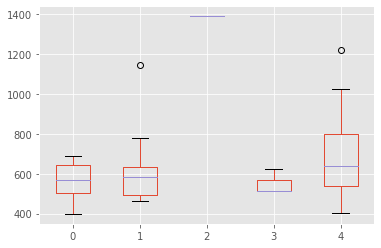

In [128]:
merged.assign(index=merged.groupby('Cluster Labels').cumcount()).pivot('index','Cluster Labels','Price').plot(kind='box')

In [135]:
merged.dtypes

Neighborhood               object
Price                     float64
Latitude                  float64
Longitude                 float64
Cluster Labels              int32
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

In [139]:
cluster0 = merged.drop( merged[ merged['Cluster Labels'] != 0 ].index)
cluster0.groupby(by='1st Most Common Venue').count()['Neighborhood']

1st Most Common Venue
Asian Restaurant       3
Coffee Shop            7
Convenience Store      1
Hotel                  2
Japanese Restaurant    2
Name: Neighborhood, dtype: int64

In [140]:
cluster1 = merged.drop( merged[ merged['Cluster Labels'] != 1 ].index)
cluster1.groupby(by='1st Most Common Venue').count()['Neighborhood']

1st Most Common Venue
Chinese Restaurant    1
Cocktail Bar          1
Grocery Store         2
Hotpot Restaurant     1
Italian Restaurant    4
Mexican Restaurant    1
Noodle House          1
Yunnan Restaurant     1
Name: Neighborhood, dtype: int64

In [141]:
cluster2 = merged.drop( merged[ merged['Cluster Labels'] != 2 ].index)
cluster2.groupby(by='1st Most Common Venue').count()['Neighborhood']

1st Most Common Venue
Antique Shop    1
Name: Neighborhood, dtype: int64

In [142]:
cluster3 = merged.drop( merged[ merged['Cluster Labels'] != 3 ].index)
cluster3.groupby(by='1st Most Common Venue').count()['Neighborhood']

1st Most Common Venue
Park            2
Tennis Court    1
Name: Neighborhood, dtype: int64

In [143]:
cluster4 = merged.drop( merged[ merged['Cluster Labels'] != 4 ].index)
cluster4.groupby(by='1st Most Common Venue').count()['Neighborhood']

1st Most Common Venue
Chinese Restaurant    2
Coffee Shop           4
Coworking Space       1
Gym                   1
Hotel                 3
Name: Neighborhood, dtype: int64

### Based on above analysis, we can conclude: 
Cluster 0 is more of a "Coffee shop area", Cluster 1 is more of a "Foreign Resteruant area", Cluster 2 is more of a "Antique shop area", Cluster 3 is "Park area", Cluster 4 is "Modern Lifestyle area"; And we see "Antique shop area" and "Modern Lifestyle area" perform better in terms of Airbnb price.

<h3>3. Visualization</h3>

In [149]:
cluster_names = merged['Cluster Labels'].map({0: 'Coffee shop area', 1:'Foreign Resteruant area', 2:'Antique shop area', 3:'Park area', 4:'Modern Lifestyle area'})
cluster_names = pd.DataFrame(cluster_names)
cluster_names.rename(columns={'Cluster Labels':'Cluster Names'}, inplace=True)
cluster_names.head()

Cluster Names
0    Modern Lifestyle area
1    Modern Lifestyle area
2  Foreign Resteruant area
3         Coffee shop area
4    Modern Lifestyle area

In [150]:
frame2 = [merged, cluster_names]
final_data = pd.concat(frame2, axis = 1)
final_data

Neighborhood        Price   Latitude   Longitude  Cluster Labels  \
0          -1.0   764.677019  39.931676  116.478618               4   
1           0.0   688.134978  39.931880  116.476359               4   
2           1.0   629.724138  39.934953  116.472465               1   
3           2.0   574.338028  39.925770  116.466964               0   
4           3.0   579.641026  39.931673  116.479403               4   
5           4.0   584.870370  39.930604  116.477823               4   
6           5.0   589.500000  39.932837  116.467235               1   
7           6.0   829.217391  39.931264  116.471659               4   
8           7.0   638.112360  39.933267  116.473743               4   
9           8.0   687.900000  39.903504  116.473258               0   
10          9.0  1026.852713  39.931487  116.476211               4   
11         10.0   643.952830  39.933229  116.471730               1   
12         11.0  1390.250000  39.899693  116.526013               2   
13         12.0   560.619048  39.941850  116.460735               0   
14         13.0   512.608696  39.936971  116.475699               3   
15         14.0   583.613636  39.926983  116.479327               0   
16         15.0   651.975000  39.918977  116.492646               0   
17         16.0   569.375000  39.945509  116.472930               0   
18         17.0  1218.911111  39.929052  116.478631               4   
19         18.0   493.200000  39.930461  116.467434               4   
20         19.0   481.875000  39.933942  116.472431               1   
21         20.0   528.300000  39.939178  116.468105               1   
22         21.0   511.222222  39.920243  116.472158               0   
23         22.0   481.000000  39.926609  116.475856               0   
24         23.0   516.538462  39.914285  116.483535               0   
25         24.0   611.166667  39.904351  116.487356               1   
26         25.0   514.750000  39.936811  116.476208               3   
27         26.0   632.000000  39.921874  116.473892               0   
28         27.0   463.166667  39.920046  116.486993               4   
29         28.0   495.777778  39.962028  116.470660               1   
30         29.0  1145.333333  39.934198  116.464107               1   
31         30.0   781.250000  39.943900  116.447120               1   
32         31.0   670.142857  39.912957  116.482282               0   
33         32.0   690.000000  39.964928  116.455305               0   
34         33.0   398.250000  39.953129  116.469291               0   
35         34.0   462.200000  39.934563  116.504243               1   
36         35.0   480.800000  39.930732  116.451137               1   
37         36.0   573.625000  39.939988  116.455584               1   
38         37.0   624.833333  39.941205  116.474106               3   
39         38.0   499.400000  39.958658  116.455985               0   
40         39.0   405.000000  39.914433  116.455897               4   
41         40.0   409.000000  39.907356  116.472702               0   

   1st Most Common Venue 2nd Most Common Venue   3rd Most Common Venue  \
0                  Hotel         Shopping Mall           Grocery Store   
1            Coffee Shop                 Hotel    Fast Food Restaurant   
2     Italian Restaurant            Hot Spring   Vietnamese Restaurant   
3       Asian Restaurant    Chinese Restaurant             Yoga Studio   
4                    Gym         Grocery Store                    Park   
5            Coffee Shop                   Gym    Fast Food Restaurant   
6     Italian Restaurant    Chinese Restaurant           Deli / Bodega   
7     Chinese Restaurant                 Hotel               Bookstore   
8                  Hotel               Stadium              Hot Spring   
9            Coffee Shop    Italian Restaurant        Ramen Restaurant   
10           Coffee Shop                 Hotel    Fast Food Restaurant   
11         Grocery Store    Italian Restaurant              H

In [152]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(5)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, price in zip(merged['Latitude'], merged['Longitude'], merged['Neighborhood'], merged['Cluster Labels'], merged['Price']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20-6000/price,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# This is the end of this project, thanks for reading!